<a href="https://colab.research.google.com/github/DifferentiableUniverseInitiative/JaxPM/blob/main/notebooks/03-MultiHost_PM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install --quiet git+https://github.com/DifferentiableUniverseInitiative/JaxPM.git
!pip install diffrax

In [1]:
!salloc --account=tkc@a100 -C a100 --gres=gpu:8 --ntasks-per-node=8 --time=00:30:00  --cpus-per-task=8 --hint=nomultithread --qos=qos_gpu-dev --nodes=2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [ ]:
!squeue -u $USER

In [1]:
!srun --jobid=411978 -n 8 python 03-MultiHost_PM.py

JAX detected proxy variable(s) in the environment as distributed setup: no_proxy VSCODE_PROXY_URI NO_PROXY. On some systems, this may cause a hang of distributed.initialize and you may need to unset these ENV variable(s)
JAX detected proxy variable(s) in the environment as distributed setup: no_proxy VSCODE_PROXY_URI NO_PROXY. On some systems, this may cause a hang of distributed.initialize and you may need to unset these ENV variable(s)
JAX detected proxy variable(s) in the environment as distributed setup: no_proxy VSCODE_PROXY_URI NO_PROXY. On some systems, this may cause a hang of distributed.initialize and you may need to unset these ENV variable(s)
JAX detected proxy variable(s) in the environment as distributed setup: no_proxy VSCODE_PROXY_URI NO_PROXY. On some systems, this may cause a hang of distributed.initialize and you may need to unset these ENV variable(s)
JAX detected proxy variable(s) in the environment as distributed setup: no_proxy VSCODE_PROXY_URI NO_PROXY. On some 

In [6]:
import numpy as np

data = np.load("multihost_pm.npz")
initial_conditions = data['initial_conditions']
lpt_displacements = data['lpt_displacements']
ode_solution_0 = data['ode_solution_0']
ode_solution_1 = data['ode_solution_1']


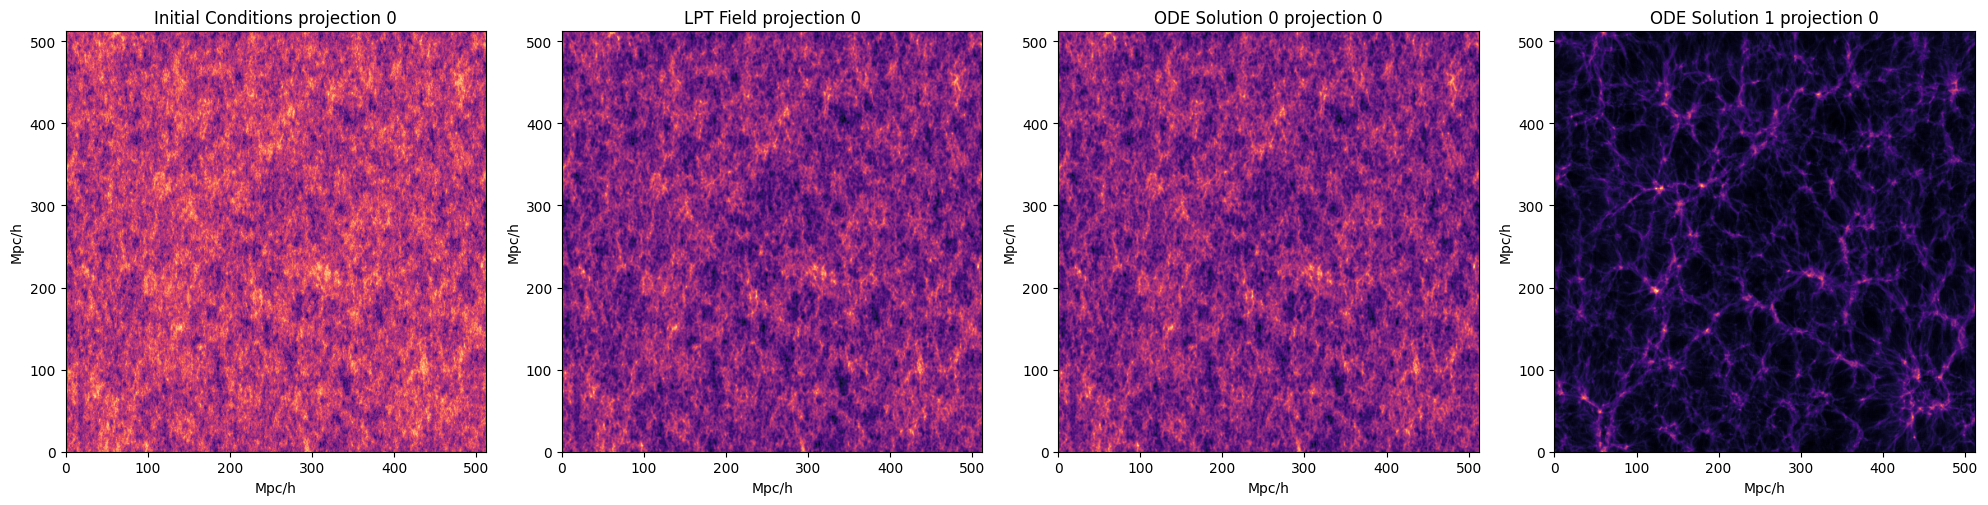

In [10]:
from visualize import plot_fields_single_projection
from jaxpm.painting import cic_paint_dx
fields = {
    "Initial Conditions": initial_conditions,
    "LPT Field": cic_paint_dx(lpt_displacements),
    "ODE Solution 0": cic_paint_dx(ode_solution_0[0]),
    "ODE Solution 1": cic_paint_dx(ode_solution_1[0])
}
plot_fields_single_projection(fields)